<a href="https://colab.research.google.com/github/ludmilaqlawik/Projekt-zaliczeniowy-WSB/blob/main/Projekt_zaliczeniowy_WSB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Temat:** Projekt zaliczeniowy - analiza danych z Twittera (CSV)

**Autor**: Ludmiła Kulawik

**Prowadzacy**: Patryk Hubar

**Cel / Etapy projektu**: wczytanie danych, czyszczenie i przygotowanie danych, analiza eksploracyjna (EDA), proste NLP (osoby/miejsca/organizacje) oraz wykres w matplotlib.

**Źródło danych**: pliki CSV udostępnione przez prowadzącego, umieszczone w repozytorium w folderze *data*/.

# KROK 1 - Organizacja pracy w projekcie


---


**Co robimy**

Wszystkie dane, pliki i foldery będą dostępne w repozytorium na GitHubie, samo pisanie projektu będzie miało miejsce w Colabie. Pobieramy więc repozytorium z GitHuba do sesji Colab.

**Dlaczego**

Colab otwiera sam notebook, ale nie pobiera automatycznie całego repozytorium, w którym umieściłam dane. Żeby móc czytać pliki CSV z folderu data/, muszę mieć je fizycznie w sesji Colab.

In [ ]:
!rm -rf Projekt-zaliczeniowy-WSB
!git clone https://github.com/ludmilaqlawik/Projekt-zaliczeniowy-WSB.git
%cd Projekt-zaliczeniowy-WSB

Cloning into 'Projekt-zaliczeniowy-WSB'...
fatal: could not read Username for 'https://github.com': No such device or address
[Errno 2] No such file or directory: 'Projekt-zaliczeniowy-WSB'
/content


**Co robimy**

W Colab wklejam token (utworzony na githubie) do komórki, klonując w ten sposób repozytorium, a następnie sprawdzam, czy mam dostęp do folderu data/
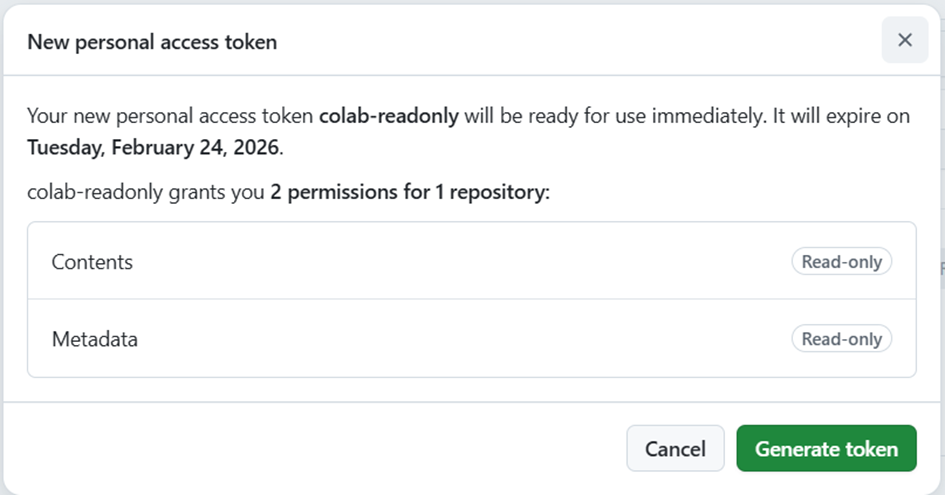

**Dlaczego**

Po sklonowaniu w Colab będzie można wczytać pliki CSV z folderu data/.

In [ ]:
!ls -la data | head

total 20104
drwxr-xr-x 2 root root    4096 Jan 29 15:35 .
drwxr-xr-x 4 root root    4096 Jan 29 15:35 ..
-rw-r--r-- 1 root root 3550943 Jan 29 15:35 dane1.csv
-rw-r--r-- 1 root root 6838762 Jan 29 15:35 dane2.csv
-rw-r--r-- 1 root root 1332701 Jan 29 15:35 dane3.csv
-rw-r--r-- 1 root root  430868 Jan 29 15:35 dane4.csv
-rw-r--r-- 1 root root  318701 Jan 29 15:35 dane5.csv
-rw-r--r-- 1 root root  972937 Jan 29 15:35 dane6.csv
-rw-r--r-- 1 root root 3552282 Jan 29 15:35 dane7.csv


In [ ]:
!ls -la data | tail -n 5

-rw-r--r-- 1 root root  972937 Jan 29 15:35 dane6.csv
-rw-r--r-- 1 root root 3552282 Jan 29 15:35 dane7.csv
-rw-r--r-- 1 root root 2301957 Jan 29 15:35 dane8.csv
-rw-r--r-- 1 root root 1256731 Jan 29 15:35 dane8.xlsx
-rw-r--r-- 1 root root       5 Jan 29 15:35 .gitkeep


# KROK 2 — Wczytanie wszystkich plików CSV i połączenie w jeden zbiór
**Co robimy**

Wczytujemy wszystkie pliki CSV z folderu data/ i łączymy je w jedną tabelę df. Zanim jednak to zrobimy, sprawdzimy ich strukturę, aby mieć pewność, że połączone dane zachowają sens.

**Dlaczego**

Skoro pliki mają identyczne kolumny i ich kolejność, to traktujemy je jako części jednego zbioru danych.

In [ ]:
import glob           # glob pomaga wyszukiwać pliki po wzorcu, np. "data/*.csv"
import os             # os to wbudowany moduł Pythona do pracy z systemem operacyjnym,daje efekt estetyczny przy wyświetlaniu ścieżek do plików
import pandas as pd   # pandas to główna biblioteka do pracy z tabelami (DataFrame), ją też importujemy

In [ ]:
csv_files = sorted(glob.glob("data/*.csv"))     # znajduję wszystkie pliki .csv w folderze data/ i sortuję je alfabetycznie. UWAGA: nie uwzględniam pliku excel ze względu na jego datę - przyjmuję, że ten plik nie nalezy do projektu
print("Znalezione pliki CSV:", len(csv_files))  # wypisuję ile plików znalazłam

Znalezione pliki CSV: 8


In [ ]:
for f in csv_files:  # przechodzę po każdym znalezionym pliku
    print(" -", f)   # wypisuję nazwę/ścieżkę pliku, żeby widzieć co dokładnie będzie wczytane

 - data/dane1.csv
 - data/dane2.csv
 - data/dane3.csv
 - data/dane4.csv
 - data/dane5.csv
 - data/dane6.csv
 - data/dane7.csv
 - data/dane8.csv


In [ ]:
# SPRAWDZENIE czy wszystkie pliki CSV mają identyczne kolumny (nazwy + kolejność).
# Wczytuję tylko nagłówki (nrows=0)
csv_files = sorted(glob.glob("data/*.csv"))

In [ ]:
base_file = csv_files[0]                                      # ustawiam pierwszy plik jako wzorzec do sprawdzenia/ porównania
base_cols = pd.read_csv(base_file, nrows=0).columns.tolist()  # uwzględniam tylko nagłówki
base_set = set(base_cols)

In [ ]:
print("Plik wzorcowy:", base_file)                            # wypisuję nazwę pliku wzorcowego (pełną ścieżkę)
print("Liczba kolumn:", len(base_cols))

Plik wzorcowy: data/dane1.csv
Liczba kolumn: 35


In [ ]:
all_ok_names = True
all_ok_order = True

In [ ]:
for f in csv_files[1:]:
    cols = pd.read_csv(f, nrows=0).columns.tolist()
    cols_set = set(cols)

    if cols_set != base_set:
        all_ok_names = False
        print("\n RÓŻNE NAZWY KOLUMN w pliku:", f)
        print("Brakuje:", sorted(base_set - cols_set))
        print("Dodatkowe:", sorted(cols_set - base_set))

    if cols != base_cols and cols_set == base_set:
        all_ok_order = False
        print("\n INNA KOLEJNOŚĆ KOLUMN w pliku:", f)

print("\n--- PODSUMOWANIE ---")
print("Identyczne NAZWY kolumn? ->", all_ok_names)
print("Identyczna KOLEJNOŚĆ? ->", all_ok_order)


--- PODSUMOWANIE ---
Identyczne NAZWY kolumn? -> True
Identyczna KOLEJNOŚĆ? -> True


Ponieważ struktura plików z danymi jest identyczna, możemy je połączyć w jedną bazę.

In [ ]:
                                                # Wczytuję każdy plik CSV do osobnej "tabeli" (DataFrame) i składam je do listy
df_list = [pd.read_csv(f) for f in csv_files]   # dla każdego pliku f: pd.read_csv(f) wczytuje go do DataFrame

In [ ]:
                                                # Łączę wszystkie DataFrame z listy w jeden duży DataFrame
df = pd.concat(df_list, ignore_index=True)      # concat skleja wiersze jeden pod drugim; ignore_index=True ustawia nowe indeksy 0..n-1

In [ ]:
print("\nPołączone dane (wiersze, kolumny):", df.shape)   # df.shape pokazuje (liczba_wierszy, liczba_kolumn)
df.head()                                                 # pokazuję pierwsze 5 wierszy, żeby upewnić się, że dane wyglądają sensownie


Połączone dane (wiersze, kolumny): (28352, 35)


,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Tue Jun 01 05:26:49 +0000 2021,NaN,https://twitter.com/MarkonMarek/status/1399598...,NaN,1,1399598285082476544,beata_skwarska,1.399598e+18,8.241523e+17,...,1468,1950,7,"Warszawa, Polska",MarKon#SilniRazem ***** ***✌️✌️✌️✌️✌️,MarkonMarek,85125,NaN,NaN,False
1,NaN,Tue Jun 01 04:15:56 +0000 2021,NaN,NaN,NaN,0,1399580447902994435,NaN,NaN,NaN,...,9384,4615,17,NaN,Józef Nowacki,21lupus,74846,NaN,NaN,False
2,NaN,Tue Jun 01 04:47:19 +0000 2021,NaN,NaN,https://ift.tt/3yTNxU8,1,1399588347358633987,NaN,NaN,NaN,...,30608,105,140,"Warszawa, Polska",WTP Warszawa,WTP_Warszawa,35367,NaN,http://www.wtp.waw.pl,False
3,NaN,Tue Jun 01 05:47:47 +0000 2021,NaN,NaN,NaN,0,1399603562343194625,LukaszKohut,1.399475e+18,4.267734e+08,...,688,1374,13,NaN,marcin (m³) 🇵🇱,m3_ememem,68546,NaN,NaN,False
4,NaN,Tue Jun 01 05:03:08 +0000 2021,WspieramyRodziny DzieńDziecka,https://twitter.com/j_wisniewska/status/139959...,http://m.in,54,1399592325324619780,NaN,NaN,NaN,...,23054,678,233,"województwo śląskie, PL",Jadwiga Wiśniewska,j_wisniewska,10483,NaN,http://www.jadwigawisniewska.pl,True


# KROK 3 — Zadanie, część 1
**Co robimy**

Przystępuję do rozwiązania zadań w projekcie zaliczeniowym, w części dotyczącej przetwarzania i oczyszczania danych.


**CZĘŚĆ 1 / PUNKT 1:**
Z kolumny created_at wyciągam skrót dnia tygodnia (Mon/Tue/...) i zamieniam go na pełną polską nazwę. Wynik zapisuję do nowej kolumny.

In [ ]:
df["created_at"] = pd.to_datetime(       # zamieniam created_at na typ daty/czasu (datetime)
    df["created_at"],                    # biorę istniejącą kolumnę created_at
    errors="coerce",                     # jeśli trafia się coś nietypowego -> zamieniam na NaT zamiast błędu
    utc=True                             # ustawiam wspólną strefę czasu UTC
)

/tmp/ipython-input-1641359239.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["created_at"] = pd.to_datetime(       # zamieniam created_at na typ daty/czasu (datetime)


In [ ]:
df["created_at_day_abbr"] = df["created_at"].dt.strftime("%a")  # tworzę skrót dnia tygodnia (np. Mon, Tue)
days_abbr_to_pl = {                                             # słownik: skrót EN -> pełna nazwa PL
    "Mon": "poniedziałek",
    "Tue": "wtorek",
    "Wed": "środa",
    "Thu": "czwartek",
    "Fri": "piątek",
    "Sat": "sobota",
    "Sun": "niedziela"
}

In [ ]:
df["created_at_day_pl"] = df["created_at_day_abbr"].map(days_abbr_to_pl)  # mapuję skróty na polskie nazwy

In [ ]:
df[["created_at", "created_at_day_abbr", "created_at_day_pl"]].head(10)   # podgląd wyniku

,created_at,created_at_day_abbr,created_at_day_pl
0,2021-06-01 05:26:49+00:00,Tue,wtorek
1,2021-06-01 04:15:56+00:00,Tue,wtorek
2,2021-06-01 04:47:19+00:00,Tue,wtorek
3,2021-06-01 05:47:47+00:00,Tue,wtorek
4,2021-06-01 05:03:08+00:00,Tue,wtorek
5,2021-06-01 04:15:04+00:00,Tue,wtorek
6,2021-06-01 05:13:00+00:00,Tue,wtorek
7,2021-06-01 05:09:13+00:00,Tue,wtorek
8,2021-06-01 06:14:26+00:00,Tue,wtorek
9,2021-06-01 03:52:47+00:00,Tue,wtorek


**CZĘŚĆ 1 / PUNKT 2:** Z kolumny user_created_at wyciągam skrót miesiąca (Jan/Feb/Jun/...) i zamieniam go na liczbę miesiąca (01-12). Wynik zapisuję do nowej kolumny.

In [ ]:
df["user_created_at"] = pd.to_datetime(
    df["user_created_at"].astype(str),
    format="%a %b %d %H:%M:%S %z %Y", # Corrected format string
    errors="coerce"
)

In [ ]:
# Tworzę skrót miesiąca (Jan/Feb/...) i zamieniam na liczbę 01-12
df["user_created_month_abbr"] = df["user_created_at"].dt.strftime("%b")
months_abbr_to_num = {
    "Jan": "01", "Feb": "02", "Mar": "03", "Apr": "04",
    "May": "05", "Jun": "06", "Jul": "07", "Aug": "08",
    "Sep": "09", "Oct": "10", "Nov": "11", "Dec": "12"
}

In [ ]:
df["user_created_month_num"] = df["user_created_month_abbr"].map(months_abbr_to_num) # Mapuję skróty miesięcy na liczbowe odpowiedniki

**CZĘŚĆ 1 / PUNKT 3**: Pobieram wszystkie linki w tweetów i przekazuję je do listy.

In [ ]:
# Pobieram wszystkie linki DO tweetów z kolumny "tweet_url" i zapisuję je do listy. Usuwam braki (NaN/None)
tweet_links_series = df["tweet_url"].dropna()

In [ ]:
# Usuwam duplikaty i zamieniam na listę Pythona
tweet_links = tweet_links_series.drop_duplicates().tolist()

In [ ]:
# Kontrola: wypisuję ile linków zebrano + kilka przykładów
print("Liczba linków do tweetów:", len(tweet_links))
print("Przykłady (pierwsze 5):", tweet_links[:5])

Liczba linków do tweetów: 23256
Przykłady (pierwsze 5): ['https://twitter.com/MarkonMarek/status/1399598285082476544', 'https://twitter.com/21lupus/status/1399580447902994435', 'https://twitter.com/WTP_Warszawa/status/1399588347358633987', 'https://twitter.com/m3_ememem/status/1399603562343194625', 'https://twitter.com/j_wisniewska/status/1399592325324619780']


In [ ]:
# Kontrola jakości: sprawdzam, czy linki wyglądają poprawnie (czy zaczynają się od http)
print("Ile linków NIE zaczyna się od http:", sum(not str(u).startswith("http") for u in tweet_links))

Ile linków NIE zaczyna się od http: 0


**CZĘŚĆ 1 / PUNKT 4**: Pobieram wszystkie linki znajdujące się w tweetów i przekazuję je do listy.

In [ ]:
import re  # regex: wyszukiwanie wzorców w tekście

In [ ]:
# Biorę tekst tweetów, a braki zamieniam na pusty tekst
text_series = df["text"].fillna("").astype(str)

In [ ]:
# Ustalam wzorzec dla szukanych linków: link zaczynający się od http/https aż do spacji
url_pattern = r"https?://\S+"

In [ ]:
# Zbieram linki z każdego tweeta (powstanie lista list)
links_nested = text_series.apply(lambda t: re.findall(url_pattern, t))

In [ ]:
# Zbieram listę list do jednej listy
all_links_raw = [u for sub in links_nested for u in sub]

In [ ]:
# Czyszczę końcówki typu kropka/przecinek/nawias po linku (częsty problem w tekstach) - krok opcjonalny
def clean_url(u: str) -> str:
    return u.rstrip(").,!?;:\"'")

all_links_clean = [clean_url(u) for u in all_links_raw]

In [ ]:
# Usuwam duplikaty, zachowując kolejność
all_links = list(dict.fromkeys(all_links_clean))

In [ ]:
# Kontrola: ile linków znaleziono + kilka przykładów
print("Liczba linków w treści tweetów:", len(all_links))
print("Przykłady (pierwsze 10):", all_links[:10])

Liczba linków w treści tweetów: 5526
Przykłady (pierwsze 10): ['https://t.co/W7BcySyuNd', 'https://t.co/4BjvKx3FlM', 'https://t.co/DXAKboKzf5', 'https://t.co/S1IoJuhtiL', 'https://t.co/1YYQPTz1le', 'https://t.co/eg2c3jnuKU', 'https://t.co/HaTE06Qn9b', 'https://t.co/NaRixsWTpo', 'https://t.co/JoLh9B5cbe', 'https://t.co/GgNSNbPAfA']


**CZĘŚĆ 1 / PUNKT 5**: Z listy wszystkich linków (all_links) wybieram linki do

*   Element listy
*   Element listy

obrazków i zapisuję je do listy image_links.

In [ ]:
import re  # regex przyda się do rozpoznania końcówek .jpg/.png itd., będę uwzględniać domeny typowe dla Twittera: pbs.twimg.com, twimg.com, pic.twitter.com, albo linki kończące się na .jpg, .png, .gif, .webp.

In [ ]:
image_links_raw = []  # tu będę zbierać linki pasujące do obrazków

In [ ]:
for u in all_links:  # przechodzę po każdym linku znalezionym w treści tweetów
    u_low = str(u).lower()  # zamieniam na małe litery, żeby łatwo sprawdzać domeny/końcówki

    # Ustalam domeny charakterystyczne dla obrazków w Twitterze
    is_twitter_image = ("pbs.twimg.com" in u_low) or ("twimg.com" in u_low) or ("pic.twitter.com" in u_low)

    # Ustalam końcówki plików graficznych
    is_image_ext = re.search(r"\.(jpg|jpeg|png|gif|webp)(\?|$)", u_low) is not None

    if is_twitter_image or is_image_ext:  # jeśli to obrazek wg jednego z warunków
        image_links_raw.append(u)         # dodaję do listy

In [ ]:
# Usuwam duplikaty, zachowując kolejność
image_links = list(dict.fromkeys(image_links_raw))

In [ ]:
print("Liczba linków do obrazków:", len(image_links))
print("Przykłady (pierwsze 10):", image_links[:10])

Liczba linków do obrazków: 0
Przykłady (pierwsze 10): []


W treści tweetów nie występują bezpośrednie linki do obrazków (np. pbs.twimg.com lub .jpg/.png). Zakładam, że linki do obrazów znajdują się w tabeli w kolumnie "media". Wykonam podpunkt 5 jeszcze raz.

In [ ]:
import re

# Biorę kolumnę media; braki zamieniam na pusty tekst
media_series = df["media"].fillna("").astype(str)

In [ ]:
# Wyciągam wszystkie linki z pola media, używając ustalomnego schematu
url_pattern = r"https?://\S+"
media_urls_nested = media_series.apply(lambda t: re.findall(url_pattern, t))

In [ ]:
# Scalam listę list do jednej listy
media_urls_raw = [u for sub in media_urls_nested for u in sub]

In [ ]:
# Czyszczę końcówki linków (kropki, przecinki, nawiasy)
def clean_url(u: str) -> str:
    return u.rstrip(").,!?;:\"'")

media_urls_clean = [clean_url(u) for u in media_urls_raw]

In [ ]:
# Filtruję tylko linki wyglądające na obrazki
image_links_raw = []
for u in media_urls_clean:
    u_low = u.lower()
    is_twitter_image = ("pbs.twimg.com" in u_low) or ("twimg.com" in u_low) or ("pic.twitter.com" in u_low)
    is_image_ext = re.search(r"\.(jpg|jpeg|png|gif|webp)(\?|$)", u_low) is not None
    if is_twitter_image or is_image_ext:
        image_links_raw.append(u)

In [ ]:
# Usuwam duplikaty, zachowując kolejność
image_links = list(dict.fromkeys(image_links_raw))

In [ ]:
# Kontrola
print("Liczba linków do obrazków (z media):", len(image_links))
print("Przykłady (pierwsze 10):", image_links[:10])

Liczba linków do obrazków (z media): 0
Przykłady (pierwsze 10): []


Niestety, tutaj też nie ujawniły się obrazki. Być może użyłam złego wzorca linku. Sprawdziłam jeszcze raz, co jest w kolumnie "media"- w danych link do obrazka jest właśnie w tej postaci: .../photo/1 (czyli link do zdjęcia w tweecie)

In [ ]:
# Pobieram więc wszystkie linki zawierające "/photo/"
media_series = df["media"].fillna("").astype(str).str.strip()

In [ ]:
# biorę tylko niepuste wartości
media_nonempty = media_series[media_series != ""]

In [ ]:
# czyszczę końcówki linków
media_nonempty = media_nonempty.str.rstrip(").,!?;:\"'")

In [ ]:
# filtruję tylko zdjęcia (linki zawierające /photo/)
image_links_series = media_nonempty[media_nonempty.str.contains(r"/photo/\d+", regex=True)]

In [ ]:
# usuwam duplikaty i zamieniam na listę
image_links = image_links_series.drop_duplicates().tolist()

In [ ]:
# Kontrola
print("Liczba linków do obrazków (z media):", len(image_links))
print("Przykłady (pierwsze 10):", image_links[:10])

Liczba linków do obrazków (z media): 1581
Przykłady (pierwsze 10): ['https://twitter.com/MarkonMarek/status/1399598285082476544/photo/1', 'https://twitter.com/j_wisniewska/status/1399592325324619780/photo/1', 'https://twitter.com/serhenryk/status/1399594808545480705/photo/1', 'https://twitter.com/Warszawa_STAT/status/1399610269467394048/photo/1', 'https://twitter.com/MarkonMarek/status/1399598174130552833/photo/1', 'https://twitter.com/OnetWiadomosci/status/1399587525220466689/photo/1', 'https://twitter.com/Glodowo/status/1399606791114219521/photo/1', 'https://twitter.com/DGWdowodztwo/status/1399593660421865475/photo/1', 'https://twitter.com/AutoMapa/status/1399607162167513089/photo/1', 'https://twitter.com/AutoMapa/status/1399592059435196416/photo/1']


**CZĘŚĆ 1 / PUNKT 6**: Usuwam z tekstu wszystkie słowa oznaczone jako stopwords i przekazuję oczyszczony tekst do nowej kolumny o nazwie text_without_stopwords

In [ ]:
import nltk
import os

print("NLTK data paths:", nltk.data.path)

# Wymuszam pobranie paczki stopwords
nltk.download("stopwords", force=True)

# Kontrola: czy folder stopwords istnieje w którymś z katalogów NLTK
for p in nltk.data.path:
    candidate = os.path.join(p, "corpora", "stopwords")
    if os.path.exists(candidate):
        print("Znaleziono stopwords w:", candidate)

NLTK data paths: ['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']
Znaleziono stopwords w: /root/nltk_data/corpora/stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
import os
import nltk
from nltk.corpus import stopwords

# 1) Wymuszam pobranie paczki stopwords
nltk.download("stopwords", force=True)

# 2) Diagnostyka: pokazuję, gdzie NLTK trzyma dane i czy widzi folder stopwords
print("NLTK data paths:", nltk.data.path)
for p in nltk.data.path:
    d = os.path.join(p, "corpora", "stopwords")
    if os.path.isdir(d):
        print("Znaleziono folder stopwords w:", d)
        print("Przykładowe pliki w stopwords:", os.listdir(d)[:15])

# 3) Próbuję wczytać stopwords PL i EN; jeśli się nie da, używam fallback
try:
    pl_stop = stopwords.words("polish")
except Exception as e:
    print("Nie udało się wczytać stopwords PL z NLTK -> używam fallback. Błąd:", repr(e))
    pl_stop = [
        "i","oraz","a","ale","albo","że","to","jest","są","być","by","nie","tak","na","w","we","z","ze","do","od",
        "po","za","o","u","jak","dla","się","ten","ta","to","te","tam","tu","tutaj","kiedy","gdy","gdzie","który",
        "która","które","co","czego","kogo","komu","kim","czym","mnie","mi","ja","ty","on","ona","ono","my","wy",
        "oni","one","nas","wam","ich","jego","jej","im","was","czy","oraz","lub"
    ]

try:
    en_stop = stopwords.words("english")
except Exception as e:
    print("Nie udało się wczytać stopwords EN z NLTK -> używam fallback. Błąd:", repr(e))
    en_stop = [
        "the","and","a","an","to","of","in","on","for","with","is","are","was","were","be","been","being",
        "it","this","that","these","those","i","you","he","she","we","they","me","him","her","them",
        "my","your","his","their","our","not","no","yes","but","or","as","at","by","from","about","into"
    ]

STOP_WORDS = set(pl_stop) | set(en_stop)
print("STOP_WORDS gotowe. Liczba słów:", len(STOP_WORDS))

def remove_stopwords(text, stop_words=STOP_WORDS):
    if text is None:
        return ""
    text = str(text)

    # usuwam linki
    text = re.sub(r"https?://\S+", " ", text)

    # usuwam znaki specjalne (zostawiam litery/cyfry + polskie znaki)
    text = re.sub(r"[^0-9A-Za-zĄąĆćĘęŁłŃńÓóŚśŹźŻż\s]", " ", text)

    # małe litery
    text = text.lower()

    # tokenizacja i usunięcie stopwords
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

# 4) Tworzę kolumnę wynikową
df["text_without_stopwords"] = df["text"].fillna("").apply(remove_stopwords)

# 5) Podgląd efektu
df[["text", "text_without_stopwords"]].head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


NLTK data paths: ['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']
Znaleziono folder stopwords w: /root/nltk_data/corpora/stopwords
Przykładowe pliki w stopwords: ['catalan', 'indonesian', 'hungarian', 'romanian', 'german', 'english', 'norwegian', 'belarusian', 'tamil', 'basque', 'danish', 'dutch', 'french', 'greek', 'kazakh']
Nie udało się wczytać stopwords PL z NLTK -> używam fallback. Błąd: OSError("No such file or directory: '/root/nltk_data/corpora/stopwords/polish'")
STOP_WORDS gotowe. Liczba słów: 253


,text,text_without_stopwords
0,@beata_skwarska Warszawa 😀 https://t.co/W7BcyS...,beata skwarska warszawa
1,Nieznani sprawcy podpalili kapliczkę nadrzewną...,nieznani sprawcy podpalili kapliczkę nadrzewną...
2,⚠️ Utrudnienia w komunikacji: L20 https://t.co...,utrudnienia komunikacji l20
3,@LukaszKohut @moanrosa @LincaAgata @jan_jozef_...,lukaszkohut moanrosa lincaagata jan jozef lubo...
4,"Dzieci to największy skarb, o który musimy dba...",dzieci największy skarb musimy dbać wspieramyr...


Niestety znowu nie udało się ściągnąć polskich "stopwords". Sprawdzę, czy NLTK pobierze stopwords do mojego własnego folderu (a nie do /root/..., które to rozwiązanie tutaj nie zadziałało”).

In [ ]:
import os
import nltk
import shutil

In [ ]:
# Ustawiam własny folder na dane NLTK (stabilny w Colabie)
NLTK_DIR = "/content/nltk_data"
os.makedirs(NLTK_DIR, exist_ok=True)

In [ ]:
# 2) Chcę, żeby NLTK najpierw szukał danych właśnie tutaj
if NLTK_DIR not in nltk.data.path:
    nltk.data.path.insert(0, NLTK_DIR)

In [ ]:
# Dla pewności ustawiam też zmienną środowiskową, która daje stabilność
os.environ["NLTK_DATA"] = NLTK_DIR

In [ ]:
# Sprawdzam, czy nie zostały jakieś śmieci z poprzednich prób
import os
print(os.path.exists("/content/nltk_data/corpora/stopwords"))
print(os.path.exists("/content/nltk_data/corpora/stopwords.zip"))

False
False


In [ ]:
# Wymuszam pobranie stopwords od nowa
print("Pobieram stopwords do:", NLTK_DIR)
nltk.download("stopwords", download_dir=NLTK_DIR, force=True)

print("NLTK data path (pierwsze):", nltk.data.path[0])

Pobieram stopwords do: /content/nltk_data
NLTK data path (pierwsze): /content/nltk_data


[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Sprawdzam, że NLTK pobrał polskie stopwords.
from nltk.corpus import stopwords

print("Czy NLTK ma 'polish'?:", "polish" in stopwords.fileids())
print("Języki stopwords (wycinek):", stopwords.fileids()[:30])

# test praktyczny:
print("Pierwsze 10 polskich stopwords:", stopwords.words("polish")[:10])

Czy NLTK ma 'polish'?: False
Języki stopwords (wycinek): ['albanian', 'arabic', 'azerbaijani', 'basque', 'belarusian', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik']


OSError: No such file or directory: '/root/nltk_data/corpora/stopwords/polish'

Niestety NLTK nie ma polskiego zestawu stopwords. Użyjemy biblioteki stopwordsiso zamiast NLTK.

In [ ]:
!pip -q install stopwordsiso

from stopwordsiso import stopwords

pl_stop = stopwords("pl")   # polskie stopwords
en_stop = stopwords("en")   # angielskie stopwords

# Pobieram stopwords PL i EN i łączę je w jeden zbiór
STOP_WORDS = set(pl_stop) | set(en_stop)
print("Liczba stopwords:", len(STOP_WORDS))
print("Przykład PL:", list(pl_stop)[:10])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.3 MB/s eta 0:00:00
Liczba stopwords: 1593
Przykład PL: ['jakiż', 'tylko', 'powinno', 'kilku', 'oraz', 'lub', 'godz', 'niej', 'ją', 'nimi']


In [ ]:
def remove_stopwords(text, stop_words=STOP_WORDS):
    # Zabezpieczenie: jeśli brak tekstu, zwraca pusty string
    if text is None:
        return ""

    # Zamieniam na string (czasem w danych mogą być inne typy)
    text = str(text)

    # Usuwam z tekstu linki (http/https)
    text = re.sub(r"https?://\S+", " ", text)

    # Usuwam znaki specjalne (zostawiam litery/cyfry + polskie znaki i spacje)
    text = re.sub(r"[^0-9A-Za-zĄąĆćĘęŁłŃńÓóŚśŹźŻż\s]", " ", text)

    # Zamieniam na małe litery
    text = text.lower()

    # Dzielę na słowa
    tokens = text.split()

    # Usuwam stopwords
    tokens = [w for w in tokens if w not in stop_words]

    # Składam z powrotem w tekst
    return " ".join(tokens)

In [ ]:
# Tworzę nową kolumnę z oczyszczonym tekstem
df["text_without_stopwords"] = df["text"].fillna("").apply(remove_stopwords)

In [ ]:
# Sprawszam efekt: porównując stan przed i po
df[["text", "text_without_stopwords"]].head(5)

,text,text_without_stopwords
0,@beata_skwarska Warszawa 😀 https://t.co/W7BcyS...,beata skwarska warszawa
1,Nieznani sprawcy podpalili kapliczkę nadrzewną...,nieznani sprawcy podpalili kapliczkę nadrzewną...
2,⚠️ Utrudnienia w komunikacji: L20 https://t.co...,utrudnienia komunikacji l20
3,@LukaszKohut @moanrosa @LincaAgata @jan_jozef_...,lukaszkohut moanrosa lincaagata jan jozef lubo...
4,"Dzieci to największy skarb, o który musimy dba...",dzieci największy skarb musimy dbać wspieramyr...


# KROK 4 — Zadanie, część 2

**Co robimy**



Przechodzimy do zadania w części 2, która skupia się na eksploracyjnej analizie danych.

**CZĘŚĆ 2 / PUNKT 1**: Przed przystępieiem do kolejnych podpunktów tej części zadania, uporządkuję sobie tabelę. Następnie poszukam tweetów z największą liczbą polubień.

In [ ]:
# Przygotowanie danych do zadania: importy i wybór kolumn
import pandas as pd
from IPython.display import display

def first_existing(candidates):
    """Zwraca pierwszą nazwę kolumny, która istnieje w df (albo None jeśli żadna nie pasuje)."""
    return next((c for c in candidates if c in df.columns), None)

# Kolumny do lajków i retweetów (różne datasety mają różne nazwy)
LIKE_COL = first_existing(["favorite_count", "like_count", "likes", "favourites_count"])
RT_COL   = first_existing(["retweet_count", "retweets", "rt_count"])

# Kolumny użytkownika
USER_ID_COL      = first_existing(["user_id", "user.id", "author_id"])
USER_NAME_COL    = first_existing(["user_screen_name", "user_username", "screen_name", "user_name", "username"])
USER_CREATED_COL = first_existing(["user_created_at"])
FOLLOWERS_COL    = first_existing(["user_followers_count", "followers_count"])
VERIFIED_COL     = first_existing(["user_verified", "verified"])

# Kolumny bezpieczeństwa i linków
SENSITIVE_COL = first_existing(["possibly_sensitive"])
TWEET_URL_COL = first_existing(["tweet_url", "url"])

# Kontrola
print("LIKE_COL:", LIKE_COL)
print("RT_COL:", RT_COL)
print("USER_NAME_COL:", USER_NAME_COL)
print("USER_CREATED_COL:", USER_CREATED_COL)
print("FOLLOWERS_COL:", FOLLOWERS_COL)
print("VERIFIED_COL:", VERIFIED_COL)
print("SENSITIVE_COL:", SENSITIVE_COL)
print("TWEET_URL_COL:", TWEET_URL_COL)

LIKE_COL: favorite_count
RT_COL: retweet_count
USER_NAME_COL: user_screen_name
USER_CREATED_COL: user_created_at
FOLLOWERS_COL: user_followers_count
VERIFIED_COL: user_verified
SENSITIVE_COL: possibly_sensitive
TWEET_URL_COL: tweet_url


In [ ]:
# Sortuję tweety malejąco po polubieniach i biorę 5 pierwszych
if LIKE_COL is None:
    print("Nie znaleziono kolumny z polubieniami (LIKE_COL). Sprawdź nazwy kolumn w df.columns.")
else:
    cols_to_show = [c for c in [TWEET_URL_COL, "text", LIKE_COL, "created_at", USER_NAME_COL] if c in df.columns and c is not None]
    top5_likes = df.sort_values(LIKE_COL, ascending=False).head(5)
    display(top5_likes[cols_to_show])

,tweet_url,text,favorite_count,created_at,user_screen_name
17732,https://twitter.com/MagdalenaW_/status/1594648...,...Elon Musk zmienił przycisk Twitter Like z ❤...,7680,2022-11-21 11:06:57+00:00,MagdalenaW_
16415,https://twitter.com/999nob0dy/status/141100596...,Imagine pójść na pierwsza randkę z dziewczyna ...,5634,2021-07-02 16:56:52+00:00,999nob0dy
28161,https://twitter.com/JKowalski_posel/status/159...,"I jak tu nie kochać Japonii? Nie dość, że inwe...",3169,2022-11-23 15:09:40+00:00,JKowalski_posel
26847,https://twitter.com/TygodnikNIE/status/1596535...,Węgiel - Ropa 2:0,2816,2022-11-26 16:04:03+00:00,TygodnikNIE
5503,https://twitter.com/JudgesSsp/status/146364803...,Polska robi tak jak Rosja https://t.co/AOSWdj0Qqi,1527,2021-11-24 23:17:40+00:00,JudgesSsp


**CZĘŚĆ 2 / PUNKT 2**: W tej części, analogicznie do poprzedniej, poszukam tweetów z największą liczbą retweetów.

In [ ]:
if RT_COL is None:
    print("Nie znaleziono kolumny z retweetami (RT_COL). Sprawdź nazwy kolumn w df.columns.")
else:
    cols_to_show = [c for c in [TWEET_URL_COL, "text", RT_COL, "created_at", USER_NAME_COL] if c in df.columns and c is not None]
    top5_rt = df.sort_values(RT_COL, ascending=False).head(5)
    display(top5_rt[cols_to_show])

,tweet_url,text,retweet_count,created_at,user_screen_name
24057,https://twitter.com/rayofwangxian/status/13997...,"HALO WARSZAWA\nchętnie rozjaśnię, ufarbuję, ze...",1638,2021-06-01 12:35:42+00:00,rayofwangxian
622,https://twitter.com/rayofwangxian/status/13997...,"HALO WARSZAWA\nchętnie rozjaśnię, ufarbuję, ze...",1638,2021-06-01 12:35:42+00:00,rayofwangxian
20279,https://twitter.com/Marcin_Pozn/status/1400706...,‼️\nA teraz perełka. Finał Was rozwali. \n10-1...,896,2021-06-04 06:50:53+00:00,Marcin_Pozn
4383,https://twitter.com/Marcin_Pozn/status/1400706...,‼️\nA teraz perełka. Finał Was rozwali. \n10-1...,896,2021-06-04 06:50:53+00:00,Marcin_Pozn
1190,https://twitter.com/hjigvs/status/139980578703...,UWAGA #Warszawa Śniadeckich 12/16\n\nPani Danu...,865,2021-06-01 19:11:21+00:00,hjigvs


**CZĘŚĆ 2 / PUNKT 3**: W tej części poszukam tych tweetów, które nie są oznaczone jako wrażliwe, czyli wyfiltruję possibly_sensitive == False

In [ ]:
if SENSITIVE_COL is None:
    print("Nie znaleziono kolumny possibly_sensitive.")
else:
    not_sensitive = df[df[SENSITIVE_COL].fillna(False) == False]  # NaN traktuję jak False
    print("Liczba tweetów niewrażliwych:", len(not_sensitive))
    cols_to_show = [c for c in [TWEET_URL_COL, "text", SENSITIVE_COL, "created_at", USER_NAME_COL] if c in df.columns and c is not None]
    display(not_sensitive[cols_to_show].head(10))

Liczba tweetów niewrażliwych: 28182


/tmp/ipython-input-3531808970.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  not_sensitive = df[df[SENSITIVE_COL].fillna(False) == False]  # NaN traktuję jak False


,tweet_url,text,possibly_sensitive,created_at,user_screen_name
0,https://twitter.com/MarkonMarek/status/1399598...,@beata_skwarska Warszawa 😀 https://t.co/W7BcyS...,False,2021-06-01 05:26:49+00:00,MarkonMarek
1,https://twitter.com/21lupus/status/13995804479...,Nieznani sprawcy podpalili kapliczkę nadrzewną...,NaN,2021-06-01 04:15:56+00:00,21lupus
2,https://twitter.com/WTP_Warszawa/status/139958...,⚠️ Utrudnienia w komunikacji: L20 https://t.co...,False,2021-06-01 04:47:19+00:00,WTP_Warszawa
3,https://twitter.com/m3_ememem/status/139960356...,@LukaszKohut @moanrosa @LincaAgata @jan_jozef_...,NaN,2021-06-01 05:47:47+00:00,m3_ememem
4,https://twitter.com/j_wisniewska/status/139959...,"Dzieci to największy skarb, o który musimy dba...",False,2021-06-01 05:03:08+00:00,j_wisniewska
5,https://twitter.com/Likaifen/status/1399580232...,Zbliża się 81 rocznica I Transportu do KL Ausc...,NaN,2021-06-01 04:15:04+00:00,Likaifen
6,https://twitter.com/serhenryk/status/139959480...,1 czerwca 1895 urodził się Tadeusz Komorowski ...,False,2021-06-01 05:13:00+00:00,serhenryk
7,https://twitter.com/bankiet_owa/status/1399593...,@BIPolska alez to brzydkie😐. Nijakie. Warszawa...,NaN,2021-06-01 05:09:13+00:00,bankiet_owa
8,https://twitter.com/Warszawa_STAT/status/13996...,"Pomimo malejącej liczby urodzeń w Warszawie, l...",False,2021-06-01 06:14:26+00:00,Warszawa_STAT
9,https://twitter.com/twojababkaa/status/1399574...,@arayoff warszawa,NaN,2021-06-01 03:52:47+00:00,twojababkaa


**CZĘŚĆ 2 / PUNKT 4**: W tej części poszukam użytkowników, którzy utworzyli swoje konta najwcześniej. Poszukam ich po kolumnie "user_created_at". Następnie wyświetlę tweety użytkownika, który na najstarsze konto.

In [ ]:
# Robię diagnozę tego, co aktualnie jest w kolumnie user_created_at w df
print("dtype:", df["user_created_at"].dtype)                    # typ kolumny
print("pierwsze 5:", df["user_created_at"].head(5).tolist())    # podgląd
print("liczba braków:", df["user_created_at"].isna().sum())     # ile NaN/NaT

# Jeśli kolumna jest datetime i pusta, zobaczysz dużo 'NaT'
print("TOP wartości (jako tekst):")
print(df["user_created_at"].astype(str).value_counts().head(5))

dtype: datetime64[ns, UTC]
pierwsze 5: [NaT, NaT, NaT, NaT, NaT]
liczba braków: 28352
TOP wartości (jako tekst):
user_created_at
NaT    28352
Name: count, dtype: int64


Wartości w kolumnie zostały nadpisane na braki. Wczytam więc 1 plik CSV “na surowo” jako tekst, żeby udowodnić, że daty w pliku jednak są (podejrzałam w excelu).

In [ ]:
import glob
import pandas as pd

# Biorę pierwszy plik CSV z folderu data
csv_files = sorted(glob.glob("data/*.csv"))
print("Liczba plików CSV:", len(csv_files))
print("Przykładowy plik:", csv_files[0])

# Wczytuję jako tekst (żeby nic nie zostało automatycznie zamienione na NaN)
test = pd.read_csv(csv_files[0], dtype=str, keep_default_na=False)

# Podglądam user_created_at dokładnie jak w Excelu
print("Pierwsze 10 wartości user_created_at z pliku:")
print(test["user_created_at"].head(10).tolist())

# Liczę, ile jest realnie niepustych w pliku
non_empty_in_file = (test["user_created_at"].str.strip() != "").sum()
print("Niepuste user_created_at w tym pliku:", non_empty_in_file, "z", len(test))

Liczba plików CSV: 8
Przykładowy plik: data/dane1.csv
Pierwsze 10 wartości user_created_at z pliku:
['Thu Oct 13 11:53:32 +0000 2016', 'Sun May 07 09:55:46 +0000 2017', 'Wed Aug 28 13:39:39 +0000 2013', 'Mon Mar 20 19:25:17 +0000 2017', 'Tue Feb 22 10:12:07 +0000 2011', 'Sat Jul 04 01:05:53 +0000 2009', 'Mon May 16 16:30:19 +0000 2016', 'Tue May 18 23:34:29 +0000 2021', 'Wed May 10 08:40:22 +0000 2017', 'Mon Dec 26 19:38:44 +0000 2016']
Niepuste user_created_at w tym pliku: 5103 z 5103


Powyżej widać, że w kolumnie "user_created_at" faktycznie są daty. Muszę odbudować je, nadając wpisom odpowiedni format.

In [ ]:
# Łączę wszystkie CSV jako tekst (żeby nie zgubić danych)
df_raw = pd.concat(
    [pd.read_csv(f, dtype=str, keep_default_na=False) for f in csv_files],
    ignore_index=True
)

# Konwertuję dane w kolumnie user_created_at na datetime z podanym formatem
FMT = "%a %b %d %H:%M:%S %z %Y" # Taki format danych podejrzałam w kolumnie user_created_at w excelu.
df_raw["user_created_at_dt"] = pd.to_datetime(df_raw["user_created_at"], format=FMT, errors="coerce", utc=True)

print("Niepuste user_created_at (surowe):", (df_raw["user_created_at"].str.strip() != "").sum(), "z", len(df_raw))
print("Nie-NaT po konwersji:", df_raw["user_created_at_dt"].notna().sum(), "z", len(df_raw))

# Kontrola
df_raw[["user_created_at", "user_created_at_dt"]].head(10)

Niepuste user_created_at (surowe): 28352 z 28352
Nie-NaT po konwersji: 28352 z 28352


,user_created_at,user_created_at_dt
0,Thu Oct 13 11:53:32 +0000 2016,2016-10-13 11:53:32+00:00
1,Sun May 07 09:55:46 +0000 2017,2017-05-07 09:55:46+00:00
2,Wed Aug 28 13:39:39 +0000 2013,2013-08-28 13:39:39+00:00
3,Mon Mar 20 19:25:17 +0000 2017,2017-03-20 19:25:17+00:00
4,Tue Feb 22 10:12:07 +0000 2011,2011-02-22 10:12:07+00:00
5,Sat Jul 04 01:05:53 +0000 2009,2009-07-04 01:05:53+00:00
6,Mon May 16 16:30:19 +0000 2016,2016-05-16 16:30:19+00:00
7,Tue May 18 23:34:29 +0000 2021,2021-05-18 23:34:29+00:00
8,Wed May 10 08:40:22 +0000 2017,2017-05-10 08:40:22+00:00
9,Mon Dec 26 19:38:44 +0000 2016,2016-12-26 19:38:44+00:00


Teraz w moim df podmienię jedną (naprawioną) kolumnę, a przed tym sprawdzę, czy mogę dokonać tej podmiany, sprawdzając, czy liczba wierszy w obu zamieniach kolumnach jest taka sama.

In [ ]:
# Sprawdzam zgodność liczby wierszy
print("len(df):", len(df))
print("len(df_raw):", len(df_raw))

# Jeśli długości są równe, mogę bezpiecznie podmienić kolumny
if len(df) == len(df_raw):
    df["user_created_at"] = df_raw["user_created_at"]
    df["user_created_at_dt"] = df_raw["user_created_at_dt"]
    print("Podmieniono user_created_at i dodano user_created_at_dt")
else:
    print("Uwaga: df i df_raw mają inną liczbę wierszy -> nie podmieniam automatycznie.")

len(df): 28352
len(df_raw): 28352
Podmieniono user_created_at i dodano user_created_at_dt


Teraz sprawdzę, ile niepustych dat jest w podmienionej kolumnie.

In [ ]:
# Kontrola po podmianie kolumn user_created_at / user_created_at_dt

print("Nie-NaT w user_created_at_dt:", df["user_created_at_dt"].notna().sum(), "z", len(df))  # ile poprawnie sparsowanych dat
print("Przykłady (5):")  # szybki podgląd
display(df[["user_created_at", "user_created_at_dt"]].head(5))

Nie-NaT w user_created_at_dt: 28352 z 28352
Przykłady (5):


,user_created_at,user_created_at_dt
0,Thu Oct 13 11:53:32 +0000 2016,2016-10-13 11:53:32+00:00
1,Sun May 07 09:55:46 +0000 2017,2017-05-07 09:55:46+00:00
2,Wed Aug 28 13:39:39 +0000 2013,2013-08-28 13:39:39+00:00
3,Mon Mar 20 19:25:17 +0000 2017,2017-03-20 19:25:17+00:00
4,Tue Feb 22 10:12:07 +0000 2011,2011-02-22 10:12:07+00:00


In [ ]:
# Wybieram kolumnę identyfikującą użytkowników wybranych najstarszych kont.

possible_keys = [
    "user_id", "userid", "author_id",
    "user_screen_name", "screen_name", "username", "user_name", "name"
]

key_col = None
for c in possible_keys:
    if c in df.columns:
        key_col = c
        break

print("Wybrana kolumna użytkownika:", key_col)
print("Kolumny w df, które zawierają 'user' w nazwie:")
print([c for c in df.columns if "user" in c.lower()])

Wybrana kolumna użytkownika: user_id
Kolumny w df, które zawierają 'user' w nazwie:
['in_reply_to_user_id', 'user_created_at', 'user_id', 'user_default_profile_image', 'user_description', 'user_favourites_count', 'user_followers_count', 'user_friends_count', 'user_listed_count', 'user_location', 'user_name', 'user_screen_name', 'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified', 'user_created_month_abbr', 'user_created_month_num', 'user_created_at_dt']


In [ ]:
# Szukam użytkownika (wybiorę go z kolumny used_id) z najwcześniejszą datą założenia konta

from IPython.display import display

tmp = df.dropna(subset=["user_created_at_dt"])  # Biorę tylko wiersze, gdzie data istnieje

if tmp.empty:
    print("Brak dat w user_created_at_dt -> nie da się wykonać punktu 4.")
elif key_col is None:
    print("Nie mam kolumny identyfikującej użytkownika (np. user_id) -> nie da się wskazać użytkownika.")
else:
    earliest_date = tmp["user_created_at_dt"].min()  # Najwcześniejsza data konta
    print("Najwcześniejsza data założenia konta:", earliest_date)

    # Biorę pierwszego użytkownika, który ma tę datę (jeśli będzie więcej takich użytkowników, to wybiorę jednego)
    earliest_user = tmp.loc[tmp["user_created_at_dt"] == earliest_date, key_col].iloc[0]
    print("Użytkownik (klucz):", earliest_user)

    # Pokazuję kilka wierszy tego użytkownika jako do0wód
    user_rows = df[df[key_col] == earliest_user]
    print("Liczba wierszy / tweetów tego użytkownika w zbiorze:", len(user_rows))

    cols_to_show = [c for c in [key_col, "user_created_at_dt", "created_at", "tweet_url", "text"] if c in df.columns]
    display(user_rows[cols_to_show].head(20))

Najwcześniejsza data założenia konta: 2006-11-26 19:35:19+00:00
Użytkownik (klucz): 23293
Liczba wierszy / tweetów tego użytkownika w zbiorze: 2


,user_id,user_created_at_dt,created_at,tweet_url,text
1384,23293,2006-11-26 19:35:19+00:00,2021-06-01 20:23:26+00:00,https://twitter.com/hex24/status/1399823926520...,Policjanci z wydziału do walki z przestępczośc...
23433,23293,2006-11-26 19:35:19+00:00,2021-06-01 20:23:26+00:00,https://twitter.com/hex24/status/1399823926520...,Policjanci z wydziału do walki z przestępczośc...


**CZĘŚĆ 2 / PUNKT 5**: W tej części poszukam użytkowników, którzy mają najwięcej followersów. Poszukam ich po kolumnie "user_followers_count". Następnie wyświetlę tweety najbardziej followanego użytownika.

In [ ]:
# Dla pewności konwertuję dane z kolumny user_followers_count na liczby
df["user_followers_count_num"] = pd.to_numeric(df["user_followers_count"], errors="coerce")

print("Braki po konwersji:", df["user_followers_count_num"].isna().sum(), "z", len(df))
df[["user_followers_count", "user_followers_count_num"]].head(10)

Braki po konwersji: 0 z 28352


,user_followers_count,user_followers_count_num
0,1468,1468
1,9384,9384
2,30608,30608
3,688,688
4,23054,23054
5,1657,1657
6,1378,1378
7,900,900
8,1433,1433
9,0,0


In [ ]:
# pewniam się, że key_col jest ustawione i istnieje w df (z poprzedniego podpunktu)
print("key_col =", key_col)
print("Czy key_col jest w df.columns?", key_col in df.columns)

key_col = user_id
Czy key_col jest w df.columns? True


In [ ]:
# Szukam użytkownika z największą liczbą followersów (maks per użytkownik)
tmp = df.dropna(subset=["user_followers_count_num"])

followers_by_user = tmp.groupby(key_col)["user_followers_count_num"].max()
max_followers = followers_by_user.max()
top_user = followers_by_user.idxmax()

print("Największa liczba followersów:", int(max_followers))
print("Użytkownik z max followers:", top_user)

Największa liczba followersów: 1913437
Użytkownik z max followers: 14493047


In [ ]:
# Filtruję użytkowników po liczbie followersów o wyświetlam tweety użytkownika z największą liczbą followersów

from IPython.display import display

user_tweets = df[df[key_col] == top_user].copy()

cols_to_show = [c for c in [key_col, "user_followers_count_num", "created_at", "tweet_url", "text"] if c in df.columns]
display(user_tweets[cols_to_show].head(50))

print("Liczba tweetów tego użytkownika w zbiorze:", len(user_tweets))

,user_id,user_followers_count_num,created_at,tweet_url,text
92,14493047,1911494,2021-06-01 07:02:05+00:00,https://twitter.com/tvn24/status/1399622262232...,W poniedziałek późnym wieczorem na Mokotowie z...
424,14493047,1911494,2021-06-01 09:19:08+00:00,https://twitter.com/tvn24/status/1399656749586...,Aktywista miejski Jan Śpiewak przegrał proces ...
1008,14493047,1911494,2021-06-01 17:00:13+00:00,https://twitter.com/tvn24/status/1399772787363...,Sprawcy szuka policja.\n\nhttps://t.co/J5YwjOPMTy
2402,14493047,1911494,2021-06-02 14:35:15+00:00,https://twitter.com/tvn24/status/1400098691860...,"""Tylko w ostatnich czterech dniach zaszczepili..."
2525,14493047,1911494,2021-06-02 15:00:28+00:00,https://twitter.com/tvn24/status/1400105038236...,W środę po południu w okolicach mostu Świętokr...
3289,14493047,1911494,2021-06-03 07:34:35+00:00,https://twitter.com/tvn24/status/1400355214381...,"Zarząd Transportu Miejskiego zapowiada, że czę..."
3572,14493047,1911494,2021-06-03 11:01:43+00:00,https://twitter.com/tvn24/status/1400407341875...,"""Jego spokój pozytywnie udziela się pozostałym..."
6355,14493047,1910432,2021-11-24 14:08:43+00:00,https://twitter.com/tvn24/status/1463509890312...,Rosyjski lodołamacz o napędzie atomowym Arktyk...
6682,14493047,1910432,2021-11-24 10:26:41+00:00,https://twitter.com/tvn24/status/1463454015715...,"Minister obrony Rosji przekazał, że w listopad..."
7828,14493047,1910432,2021-11-23 13:32:08+00:00,https://twitter.com/tvn24/status/1463138298457...,Ukraiński wywiad poinformował o zwiększonej go...


Liczba tweetów tego użytkownika w zbiorze: 29


# KROK 5 — Zadanie, część 3

**Co robimy**


Przechodzę do zadania w części 3, która skupia się na przetwarzaniu języka naturalnego. Aby zrobić to, będę instalowała bibliotekę NLP i polski model językowy.

In [ ]:
# Instaluję *ściągam na komputer) spaCy i polski model NER

import spacy
import spacy.util

MODEL_NAME = "pl_core_news_sm"

if not spacy.util.is_package(MODEL_NAME):
    # instaluję spaCy i pobieram polski model NER
    !pip -q install spacy
    !python -m spacy download pl_core_news_sm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 42.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Ładuję polski model NER
import spacy
nlp = spacy.load("pl_core_news_sm")


In [ ]:
# Tworzę kolumny persons / places / organizations na podstawie polskich etykiet NER. Model spaCy dla języka polskiego zwraca etykiety persName/placeName/geogName/orgName, więc mapuję je na wymagane kolumny persons/places/organizations.
# filtr: pomijam encje zaczynające się od "@"

texts = df["text"].fillna("").astype(str).tolist()

persons_list = []
places_list = []
orgs_list = []

for doc in nlp.pipe(texts, batch_size=50):
    persons = []
    places = []
    orgs = []

    for ent in doc.ents:
        clean_ent = ent.text.strip()
        if clean_ent.startswith("@"):
            continue

        if ent.label_ == "persName":
            persons.append(clean_ent)
        elif ent.label_ in ("placeName", "geogName"):
            places.append(clean_ent)
        elif ent.label_ == "orgName":
            orgs.append(clean_ent)

    # usuwam duplikaty zachowując kolejność
    persons = list(dict.fromkeys(persons))
    places  = list(dict.fromkeys(places))
    orgs    = list(dict.fromkeys(orgs))

    persons_list.append(persons)
    places_list.append(places)
    orgs_list.append(orgs)

df["persons"] = persons_list
df["places"] = places_list
df["organizations"] = orgs_list

In [ ]:
# Kontrola
print("Wiersze z osobami:", (df["persons"].apply(len) > 0).sum())
print("Wiersze z miejscami:", (df["places"].apply(len) > 0).sum())
print("Wiersze z organizacjami:", (df["organizations"].apply(len) > 0).sum())

df[["text", "persons", "places", "organizations"]].head(10)

Wiersze z osobami: 10457
Wiersze z miejscami: 19564
Wiersze z organizacjami: 14693


,text,persons,places,organizations
0,@beata_skwarska Warszawa 😀 https://t.co/W7BcyS...,[],[],[]
1,Nieznani sprawcy podpalili kapliczkę nadrzewną...,[],"[warszawskim, Grochowie, ul., Podskarbińska, u...",[]
2,⚠️ Utrudnienia w komunikacji: L20 https://t.co...,[],[Utrudnienia],[]
3,@LukaszKohut @moanrosa @LincaAgata @jan_jozef_...,[],"[Warszawa, polskiego, Warschau]",[]
4,"Dzieci to największy skarb, o który musimy dba...",[Franio],[Warszawa],[]
5,Zbliża się 81 rocznica I Transportu do KL Ausc...,[Wojciecha Korkucia],"[ul., Warszawa]","[I Transportu do KL Auschwitz, Społeczny Komit..."
6,1 czerwca 1895 urodził się Tadeusz Komorowski ...,"[Tadeusz Komorowski, Gdybyśmy]","[RP, Warszawa]","[Naczelny Wódz Polskich Sił Zbrojnych, Komenda..."
7,@BIPolska alez to brzydkie😐. Nijakie. Warszawa...,[],"[Nijakie, Warszawa]",[]
8,"Pomimo malejącej liczby urodzeń w Warszawie, l...",[],"[Warszawie, Mazowsze]",[Warszawa]
9,@arayoff warszawa,[],[],[]


# KROK 5 — Zadanie, część 4

**Co robimy**

Przechodzę do zadania w części 4, w której, wykorzystując pakiet matplotlib, wykonam wykres ilustrujący liczbę tweetów per dzień tygodnia.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Zamieniam kolumnę created_at na datetime, podając format (żeby uniknąć warningów i przyspieszyć parsowanie)
# Format odpowiada zapisowi typu: "Thu Dec 01 14:22:46 +0000 2022"
df["created_at_dt"] = pd.to_datetime(
    df["created_at"],
    format="%a %b %d %H:%M:%S %z %Y",
    errors="coerce"
)


In [ ]:
# Tworzę polskie nazwy dni tygodnia (0=poniedziałek, ..., 6=niedziela)
days_pl = {
    0: "poniedziałek",
    1: "wtorek",
    2: "środa",
    3: "czwartek",
    4: "piątek",
    5: "sobota",
    6: "niedziela",
}

In [ ]:
# Wyciągam numer dnia tygodnia z daty i mapuję go na polską nazwę
df["day_of_week_num"] = df["created_at_dt"].dt.dayofweek
df["day_of_week_pl"] = df["day_of_week_num"].map(days_pl)


In [ ]:
# Zliczam tweety dla każdego dnia tygodnia
counts = df["day_of_week_pl"].value_counts()

In [ ]:
# Ustawiam kolejność dni (żeby wykres był logiczny, a nie alfabetyczny)
order = ["poniedziałek", "wtorek", "środa", "czwartek", "piątek", "sobota", "niedziela"]
counts = counts.reindex(order, fill_value=0)

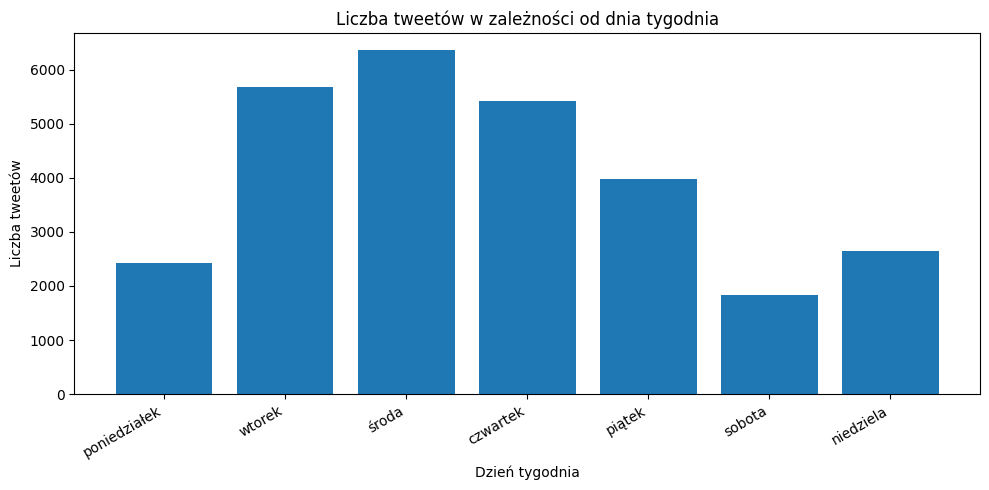

In [ ]:
# Rysuję wykres słupkowy
plt.figure(figsize=(10, 5))
plt.bar(counts.index, counts.values)
plt.title("Liczba tweetów w zależności od dnia tygodnia")
plt.xlabel("Dzień tygodnia")
plt.ylabel("Liczba tweetów")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

Dziękuję za uwagę :-)